


└───DANE
    ├───Censo, (2018)
    │       25815 Infograma Censo 2018.pdf
    │       Censo 25817Tocancipá, 2018.pdf
    │       Censo, 2018.csv
    │       Censo, 2018.xlsx
    │
    └───Microdatos EM, (2021)
        │   (Capítulo A).csv
        │   (Capítulo B).csv
        │   (Capítulo C).csv
        │   (Capítulo D).csv
        │   (Capítulo E).csv
        │   (Capítulo F).csv
        │   (Capítulo G).csv
        │   (Capítulo H).csv
        │   (Capítulo I).csv
        │   (Capítulo J).csv
        │   (Capítulo K).csv
        │   (Capítulo L).csv
        │   (Capítulo M1).csv
        │   (Capítulo M2).csv
        │   Boletin_EM_2021.pdf
        │   DANE-DIMPE-EM-2021.xml
        │   Encuesta Multipropósito, (2021).pdf
        │   Preguntas Multipropósito, (2021).pdf
        │
        ├───FilesPDF
        │       Censo 25817Tocancipá, 2018.pdf
        │       EM Demografia, (2021).pdf
        │       EM Educación, (2021).pdf
        │       EM Muestreo, (2021).pdf
        │       EM Participación, (2021).pdf
        │       EM Salud, (2021).pdf
        │       EM TIC, (2021).pdf
        │       EM Trabajo, (2021).pdf
        │
        └───RARFiles
                (Capitulo A).zip
                (Capitulo B).zip
                (Capitulo C).zip
                (Capitulo D).zip
                (Capitulo E).zip
                (Capitulo F).zip
                (Capitulo G).zip
                (Capitulo H).zip
                (Capitulo I).zip
                (Capitulo J).zip
                (Capitulo K).zip
                (Capitulo L).zip
                (Capitulo M1).zip
                (Capitulo M2).zip

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def age_category(edad):
    if edad < 18:
        return '0-17'
    elif edad < 25:
        return '18-24'
    elif edad < 35:
        return '25-34'
    elif edad < 45:
        return '35-44'
    elif edad < 55:
        return '45-54'
    elif edad < 65:
        return '55-64'
    else:
        return '65+'
    

def age_overall(edad):
    if edad < 15:
        return '0-14'
    elif edad < 60:
        return '15-59'
    else:
        return '60+'
    
def hour_category(hours):
    if hours < 18:
        return '0-17'
    elif hours < 35:
        return '18-34'
    elif hours < 45:
        return '35-44'
    elif hours < 55:
        return '45-54'
    else:
        return '55+'
    
def month_category(months):
    if months < 4:
        return '0-3'
    elif months < 7:
        return '4-6'
    elif months < 10:
        return '7-9'
    elif months < 13:
        return '10-12'
    else:
        return '12+'
    

# Glosario de Siglas:

# V (25-44 años): Voluntarios Academicos
# MI (14-24 años): Mentores Inversos
# LI (20-34 años): Lab Innovación
# PC: Participantes de CircleUp



def age_category_detailed(edad):
    if edad <= 13:
        return '0-13'
    elif edad <= 17:
        return '14-17'
    elif edad <= 19:
        return '18-19'
    elif edad <= 24:
        return '20-24'
    elif edad <= 29:
        return '25-29'
    elif edad <= 34:
        return '30-34'
    elif edad <= 39:
        return '35-39'
    elif edad <= 44:
        return '40-44'
    elif edad <= 49:
        return '45-49'
    elif edad <= 54:
        return '50-54'
    elif edad <= 59:
        return '55-59'
    elif edad <= 64:
        return '60-64'
    elif edad <= 69:
        return '65-69'
    elif edad <= 74:
        return '70-74'
    else:
        return '75+'


In [3]:
def format_category(category):
    formats = {
        'MI': f'<span class="mi">({category})</span>',
        'PC': f'<span class="pc">({category})</span>',      
        'LI': f'<span class="li">({category})</span>',     
        'VA': f'<span class="va">({category})</span>'          
    }
    return formats[category]

def age_format(rango):
    categories = {
        '0-13': ['PC'],
        '14-17': ['MI', 'PC'],
        '18-19': ['MI', 'PC'],
        '20-24': ['MI', 'LI', 'PC'],
        '25-29': ['VA', 'LI', 'PC'],
        '30-34': ['VA', 'LI', 'PC'],
        '35-39': ['VA', 'PC'],
        '40-44': ['VA', 'PC'],
        '45-49': ['PC'],
        '50-54': ['PC'],
        '55-59': ['PC'],
        '60-64': ['PC'],
        '65-69': ['PC'],
        '70-74': ['PC'],
        '75+': ['PC']
    }
    
    cats = categories[rango]
    formatted_cats = ' '.join(format_category(cat) for cat in cats)
    
    return f"{rango} {formatted_cats}"

In [4]:
adata = pd.read_csv('./Datos/DANE/Microdatos EM, (2021)/(Capítulo A).csv', 
                    encoding='utf-8', 
                    encoding_errors='replace', 
                    sep=';',low_memory=False)

dirs = adata[adata['MPIO'] == 25817]['DIRECTORIO'].values
DIRECTORIO = dirs.astype(np.int32)

def load_data(chapter,dfeatures=None):
  """
  DIRECTORIO: Identificador numérico de vivienda Tocancipa
  """
  data = pd.read_csv(f'./Datos/DANE/Microdatos EM, (2021)/(Capítulo {chapter}).csv', 
                    encoding='utf-8', 
                    encoding_errors='replace', 
                    sep=';',low_memory=False)
  data = data[data['DIRECTORIO'].isin(DIRECTORIO)]
  if dfeatures:
    long_columns = list(dfeatures[chapter].values())
    data.columns = long_columns
    return data
  else:
    return data

In [5]:
import xml.etree.ElementTree as ET

tree = ET.parse('./Datos/DANE/Microdatos EM, (2021)/DANE-DIMPE-EM-2021.xml')
root = tree.getroot()

namespace = {'d': 'http://www.icpsr.umich.edu/DDI'}

groups = [data.get('ID') for data in root.findall('d:dataDscr/d:varGrp', namespace)]
files = [data.get('ID') for data in root.findall('d:fileDscr', namespace)]
chapters = ['A','B','C','D','E','F','G','H','I','J','K','L','M1','M2']
data_explorer = dict(zip(chapters,files))

dfeatures = {}

def get_qstn(parent, subelem_name, default=None, namespaces=None):
    if namespaces:
        subelem = parent.find(subelem_name, namespaces)
    else:
        subelem = parent.find(subelem_name)
    try:
        return subelem.text.strip() if subelem is not None else default
    except:
        return subelem.text if subelem is not None else default

for idx,file in data_explorer.items():
    metadata = {}
    vars_file = root.findall(f'.//d:var[@files="{file}"]', namespace)
    for var in vars_file:
        name = var.get('name')
        qstn = get_qstn(var, 'd:qstn/d:qstnLit', namespaces=namespace)
        catgry = get_qstn(var, 'd:catgry/d:qstnLit', namespaces=namespace)
        metadata[name] = qstn
    dfeatures[idx] = metadata

def answers_mapping(chapter,question): 
    mapping_answer = {}
    files = data_explorer[chapter]
    vars_file = root.findall(f'.//d:var[@files="{files}"]', namespace)
    vars_file = [var for var in vars_file if var.get('name') == question]
    answer_types = vars_file[0].findall('.//d:catgry', namespace)
    for catgry in answer_types:
        key = int(get_qstn(catgry, 'd:catValu', namespaces=namespace))
        value = get_qstn(catgry, 'd:labl', namespaces=namespace)
        mapping_answer[key] = value
    return mapping_answer


def bad_nulls(chapter,bads,goods):
    data = load_data(chapter)
    cols = data.isnull().sum().sort_values(ascending=False).to_frame(name='nulls').reset_index()
    bad = cols[cols['nulls'] >= bads]['index'].values
    god = cols[cols['nulls'] <= goods]['index'].values
    return (bad,god)

import re

def good_qstn(chapter,bads,goods):
    pattern = r'(.*)\n'
    good = bad_nulls(chapter,bads,goods)[1]
    for idx, qstn in enumerate(good):
        match = re.search(pattern, dfeatures[chapter][qstn])
        if match:
            question = match.group(1)
            print(f'#{idx}({qstn}) | {question}')

In [6]:
from functools import reduce

def map_dataframe(dataframe:pd.DataFrame,chapter):

  for feature in dataframe.columns:
    try:
      mapped = answers_mapping(chapter,feature)
      if mapped:
        dataframe[feature] = dataframe[feature].map(mapped)
    except:
      pass
  return dataframe


def unified_data(chapter):

  nulls_allowed = 1000

  demo_data = load_data('E')
  demo_data['AGE_RANGE'] = demo_data['NPCEP4'].apply(age_category)
  demo_data['AGE_DETAIL'] = demo_data['NPCEP4'].apply(age_category_detailed)
  # demo_bad = list(bad_nulls('E',nulls_allowed,nulls_allowed)[0])
  # demo_data.drop(demo_bad,axis='columns',inplace=True)
  demo_data = map_dataframe(demo_data,'E')
  

  chapter_data = load_data(chapter)
  # chapter_bad = list(bad_nulls(chapter,nulls_allowed,nulls_allowed)[0])
  # chapter_data.drop(chapter_bad,axis='columns',inplace=True)
  chapter_data = map_dataframe(chapter_data,chapter)

  join_params = ['DIRECTORIO', 'DIRECTORIO_HOG', 'DIRECTORIO_PER', 'SECUENCIA_P','ORDEN']
  dataset = demo_data.merge(chapter_data,how='inner',on=join_params)

  return dataset

def multiple_merge(dfs, on, how='inner'):
    def merge_with_rename(left, right):
        # Identificar columnas comunes que no son parte de 'on'
        common_cols = set(left.columns) & set(right.columns) - set(on)
        
        # Renombrar columnas comunes en el DataFrame de la derecha
        rename_dict = {col: f"{col}_{right.name}" for col in common_cols}
        right_renamed = right.rename(columns=rename_dict)
        
        # Realizar el merge
        merged = pd.merge(left, right_renamed, on=on, how=how)
        return merged

    # Asignar nombres a los DataFrames si no los tienen
    for i, df in enumerate(dfs):
        if not hasattr(df, 'name') or df.name is None:
            df.name = f'df_{i}'

    return reduce(merge_with_rename, dfs)

def unified():
    join_params = ['DIRECTORIO', 'DIRECTORIO_HOG', 'DIRECTORIO_PER', 'SECUENCIA_P', 'ORDEN']
    chapters = ['E', 'H', 'J', 'I', 'K', 'F']
    datasets = []

    for chapter in chapters:
        data = load_data(chapter)
        data = map_dataframe(data, chapter)
        if chapter == 'E':
            data['AGE_RANGE'] = data['NPCEP4'].apply(age_category)
            data['AGE_DETAIL'] = data['NPCEP4'].apply(age_category_detailed)
            data['AGE_OVERALL'] = data['NPCEP4'].apply(age_overall)
            data['AGE_FORMAT'] = data['NPCEP4'].apply(lambda x : age_format(age_category_detailed(x)))
        # if chapter == 'K':
        #    data['MONTH_RANGE'] = data['NPCKP20A'].apply(month_category)
        # # Asignar un nombre al DataFrame basado en el capítulo
        data.name = f'chapter_{chapter}'
        datasets.append(data)

    big_data = multiple_merge(datasets, on=join_params)
    
    big_data.columns = [col.split('_chapter')[0] if '_chapter' in col else col for col in big_data.columns]
    
    return big_data

In [7]:
import numpy as np
from scipy import stats

def pop_estimate_raw(value):
    total_population_2018 = 39416
    total_sample_2021 = 2015
    if value > total_sample_2021:
        return "Error: El valor está fuera de rango."
    
    # Calcular la proporción en la muestra
    sample_proportion = value / total_sample_2021
    
    # Calcular el error estándar
    standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_sample_2021)
    
    # Calcular el intervalo de confianza del 95%
    confidence_interval = stats.norm.interval(0.95, loc=sample_proportion, scale=standard_error)
    
    # Extrapolar a la población total
    estimated_population_value = round(sample_proportion * total_population_2018)
    estimated_population_interval = (
        round(confidence_interval[0] * total_population_2018),
        round(confidence_interval[1] * total_population_2018)
    )
    
    # Calcular el error estándar relativo
    relative_standard_error = (standard_error / sample_proportion) * 100
    
    return f"""
    Estimated proportion: {sample_proportion*100:.2f}%,
    Estimated population value: {estimated_population_value},
    95% Confidence Interval: {estimated_population_interval},
    Relative Standard Error (%)": {relative_standard_error:.2f}%
    """
    # Explanation:
    # La proporción estimada representa la fracción de la población que se estima posee 
    # la característica de interés. Se calcula dividiendo el valor observado en la muestra 
    # entre el tamaño total de la muestra.
    
    # Disclaimer:
    # Estas estimaciones están basadas en datos del censo de 2018 y 
    # una muestra de 2021. Debido al rápido crecimiento poblacional de Tocancipá, es probable 
    # que estas estimaciones subestimen los valores actuales. Los usuarios deben considerar 
    # un margen de error adicional al interpretar estos resultados. Se recomienda utilizar 
    # estas estimaciones como una referencia general y no como valores precisos para la 
    # población actual de Tocancipá.
    # """

def pop_estimate(value):
    total_population_2018 = 39416
    total_sample_2021 = 2015
    if value > total_sample_2021:
        return "Error: El valor está fuera de rango."

    sample_proportion = value / total_sample_2021

    standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_sample_2021)
  
    confidence_interval = stats.norm.interval(0.95, loc=sample_proportion, scale=standard_error)
    
    estimated_population_interval = (
        round(confidence_interval[0] * total_population_2018),
        round(confidence_interval[1] * total_population_2018)
    )
    
    relative_standard_error = (standard_error / sample_proportion) * 100
    return f'{estimated_population_interval} | {relative_standard_error:.2f}%'


def pop_estimate_range(value):
    total_population_2018 = 39416
    total_sample_2021 = 2015
    if value > total_sample_2021:
        return "Error: El valor está fuera de rango."

    sample_proportion = value / total_sample_2021

    standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_sample_2021)

    confidence_interval = stats.norm.interval(0.95, loc=sample_proportion, scale=standard_error)
    
    estimated_population_interval = (
        round(confidence_interval[0] * total_population_2018),
        round(confidence_interval[1] * total_population_2018)
    )
    
    relative_standard_error = (standard_error / sample_proportion) * 100
    return f'Est. {estimated_population_interval[0]:,} a {estimated_population_interval[1]:,} Pers.'


def pop(value):
    if value != 0:
        total_population_2018 = 39416
        total_sample_2021 = 2015
        if value > total_sample_2021:
            return "Error: El valor está fuera de rango."

        sample_proportion = value / total_sample_2021
        

        standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_sample_2021)

        confidence_interval = stats.norm.interval(0.95, loc=sample_proportion, scale=standard_error)
        
        estimated_population_interval = (
            round(confidence_interval[0] * total_population_2018),
            round(confidence_interval[1] * total_population_2018)
        )
        
        relative_standard_error = (standard_error / sample_proportion) * 100
        return f'({estimated_population_interval[0]:,}-{estimated_population_interval[1]:,})'
    
    else:
        return f'({value}-{value})' 

In [8]:
def unstack_data(chapter,questions,question_names,idx_name=None,idx=None):
  data = load_data(chapter, dfeatures=None)

  categry_columns = {
                    'NPCEP4':['AGE_RANGE',age_category],
                    'NPCKP20A':['MONTH_RANGE',month_category]
                    }

  for cat_key,cat_name in categry_columns.items():

    if data.columns.__contains__(cat_key):
      data[cat_name[0]] = data[cat_key].apply(cat_name[1])
    
  data.dropna(inplace=True, subset=questions, how='any')

  for qstn in questions:
    if qstn not in ['AGE_RANGE','MONTH_RANGE','SALARY_RANGE']:
      try:
        data[qstn] = data[qstn].astype('int')
        data[qstn] = data[qstn].map(answers_mapping(chapter, qstn))
      except:
        print('Non Float Value')

  top_5 = data[questions[0]].value_counts().nlargest(15).index
  data_filtered = data[data[questions[0]].isin(top_5)]

  data_pivot = pd.pivot_table(data_filtered, values='DIRECTORIO', index=[questions[0]], columns=[questions[1]], 
                                aggfunc='count', fill_value=0)
  
  sample_name = f'Muestra ({(len(data)/2015)*100:.2f}%)'
  data_stacked = data_pivot.stack().reset_index()
  data_stacked.columns = question_names + [sample_name]
  data_stacked = data_stacked[data_stacked[sample_name] > 5]
  data_stacked = data_stacked.sort_values(by=[question_names[0], sample_name], ascending=[True, False])
  data_stacked = data_stacked.head(10)

  data_stacked.set_index(question_names, inplace=True)
  data_stacked[f'Acumulado'] = (data_stacked[sample_name].cumsum() * 100/len(data_filtered)).apply(lambda x:f'{x:.2f}%')
  data_stacked['IC 95% | % Standard Error'] = data_stacked[sample_name].apply(lambda x: pop_estimate(int(x)))
  if idx_name is not None:
    data_stacked.rename_axis(index={question_names[idx]: f'{idx_name}'}, inplace=True)
  
  return data_stacked

In [9]:
def plot_hist_hue(data, hue, question, name, hue_name,image_name=None):
    
    font_size = 10
    font_sub = 11
    font_title = 11
    
    df = data.dropna(subset=[question, hue])
    hue_values = df[hue].unique()
    cols = min(2, len(hue_values))
    rows = (len(hue_values) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(6.5*cols, 4*rows), squeeze=False)
    # fig.suptitle(f'Distribución Frec. | Total {len(df)} ({(len(df)*100/2015):.2f}%)\n{hue_name}', fontsize=font_title, fontweight='bold', y=0.95)
    
    for idx, hue_value in enumerate(hue_values):
        ax = axes[idx // cols, idx % cols]
        hue_data = df[df[hue] == hue_value]
        
        if pd.api.types.is_numeric_dtype(hue_data[question]):
            sns.histplot(data=hue_data, x=question, kde=True, ax=ax)
        else:
            sns.countplot(data=hue_data, x=question, ax=ax)
        
        total = len(hue_data)
        for p in ax.patches:
            height = p.get_height()
            percentage = f'{100 * height / total:.1f}%'
            ax.annotate(f'{int(height)}\n({percentage})', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', xytext=(0, 5),
                        textcoords='offset points', fontsize=font_size)
        
        heights = [p.get_height() for p in ax.patches]
        ax.patches[heights.index(max(heights))].set_facecolor('lightblue')
        
        estimate = pop_estimate_range(int(total))
        
        ax.set_title(f'Responde ({hue_value})\nTotal {total} ({(total*100/len(df)):.2f}%) | {estimate}', fontsize=font_sub)
        ax.set_xlabel(name, fontsize=font_sub, fontweight='bold')
        ax.set_ylabel('Frecuencia', fontsize=font_sub, fontweight='bold')
        
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.tick_params(axis='both', which='major', labelsize=8)
        
        ymax = max(heights)
        ax.set_ylim(0, ymax * 1.20)

    for idx in range(len(hue_values), rows * cols):
        fig.delaxes(axes[idx // cols, idx % cols])

    plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=1, hspace=0.55, wspace=0.3)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)
    
    if image_name is not None:
        path = './circleup/figures'
        plt.savefig(f'{path}/{image_name}.png')

    plt.show()

### **Vivienda**

In [10]:
# data = load_data('B', dfeatures=None)
# plot_donut(data, 'NVCBP10','B','Dist. Tipos Vivienda Tocancipá','Tipos Vivienda','Tipos Vivienda')

In [11]:
# #. ¿Cuáles de los siguientes problemas presenta el entorno donde está ubicada su vivienda? Inseguridad
# plot_donut(data, 'NVCBP15C','B','Dist. Inseguridad Tocancipá','Inseguridad',None)

In [12]:
# #  ¿Cuáles de los siguientes problemas presenta el entorno donde está ubicada su vivienda?: 4. Contaminación del aire
# plot_donut(data, 'NVCBP15D','B','Dist. Contaminación Aire Tocancipá','Contaminación',None)

### **Educacion**

In [13]:
datasets = unified()

In [14]:
#SEXO, AGE_RANGE: NPCEP4, ESTADO CIVIL: NPCEP7, DONDE NACIO: NPCEP11A, UBICACION HACE 5 ANOS: NPCEP13, OTRO PAIS-PAIS HACE 5 ANOS: NPCEP13D
#EDUCACION NIVEL: NPCHP4,   Deporte: NPCHP30B, Teatro, Danza, Música: NPCHP30C, Biblioteca: NPCHP30E, Lectura: NPCHP30G,      ASISTENCIA ESCOLAR:NPCHP2, ALFABETIZACION: NPCHP1
#EDU DISCRIMINACION APARIENCIA FISICA: NPCHP35E , CONDICION SOCIAL: NPCHP35I, EXTRANJERO: NPCHP35K  
#TRABAJO SITUACION LABORAL: NPCKP1, TIPO LABOR: NPCKP17, TIPO CONTRATO: NPCKP20, MONTH_RANGE LABORADO, MEDIO DE EMPLEARSE: NPCKP22, UBICACION LABOR: NPCKPA46, MODALIDAD VIRTUAL: NPCKNP48 TRA. COMUNITARION NO REMUNERADO: NPCKP59G
#PARTICIPACION SATISFECHO CON: VIDA: NPCJP9AA, INGRESOS: NPCJP9AC,  SALUD: NPCJP9AD, TRABAJO: NPCJP9AE,  AMIGOS: NPCJP9AG, COMUNIDAD: NPCJP9AK
#TIC FREQ USO INTERNET:NPCIP4, USO DISPOSITIVOS: NPCIP1, INTERNET VIVIENDA: NPCIP7A, INTERNET EDU: NPCIP8F, INT. ENTRETENIMINETO: NPCIP7A, TRABAJAR: NPCIP8K, REDES SOCIALES: NPCIP8C, WHATSAPP: NPCIP16D, NO USO INT.: NPCIP5
#SALUD ESTADO GENERAL:NPCFP12, CANCER: NPCFP14B, TRANS. MENTALES: NPCFP14C

In [15]:
custom_data = datasets.copy()

education = ['Técnico', 'Universitaria completa (con título)','Especialización completa (con título)','Universitaria  incompleta (sin título)', 'Tecnológico','Maestría completa (con título)']
# education = ['Media (10° - 13°)', 'Técnico','Tecnológico','Universitaria  incompleta (sin título)', 'Universitaria completa (con título)','Especialización completa (con título)']
# genere_filter = custom_data['SEXO'] == 'Mujer'
# location_filter = custom_data['NPCEP13D'] == 'Venezuela'
edu_filter = custom_data['NPCHP4'].isin(education)
labor_filter = custom_data['NPCKP1'] == 'Trabajando'
internet_edu = custom_data['NPCIP8F'] == 'Si'
age_min = custom_data['NPCEP4'] >= 20
age_max = custom_data['NPCEP4'] <= 34
summary = custom_data[(age_min) & (age_max) & (edu_filter) & (internet_edu)]

custom_data = summary.copy()
age = 'NPCEP11A'
nombre = 'Lugar Nacimiento'
nombre_fig = 'fig-li-born'
title = 'Lugar de Nacimiento - Población (LI)'

custom_data = custom_data.rename(columns={'DIRECTORIO':'Muestra',age:nombre,'SEXO':'Genero','NPCEP11A':'Lugar Nacimiento'})
custom_data = pd.pivot_table(custom_data,values='Muestra',index=['Genero'],columns=[nombre],aggfunc='count', fill_value=0)
custom_data.map(lambda x: f'{x} {pop(x)}')

Lugar Nacimiento,Este municipio,Otro municipio,Otro país
Genero,,,
Hombre,8 (48-265),25 (299-680),1 (-19-58)
Mujer,3 (-8-125),"40 (542-1,023)",1 (-19-58)


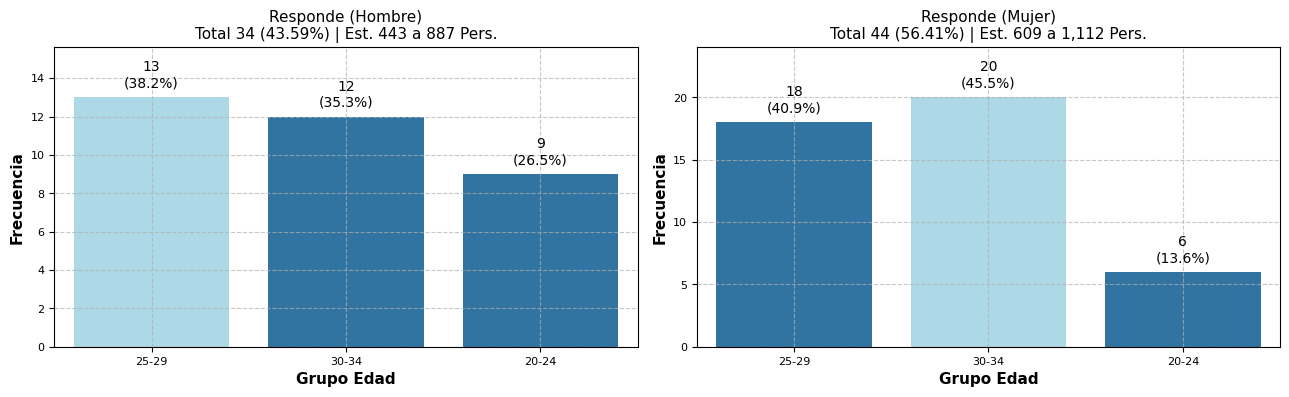

In [16]:
plot_hist_hue(summary, 'SEXO', 'AGE_DETAIL','Grupo Edad','Genero')

In [22]:
def plot_hist(chapter, question, name,bin=10,image_name=None):

    data = load_data(chapter)
    data.dropna(inplace=True, subset=[question], how='any')

    sns.set_style("whitegrid")
    sns.set_palette("deep")

    fig, ax = plt.subplots(figsize=(15, 5))
    
    # Calcular los bins y las frecuencias
    counts, bins, _ = ax.hist(data[question], bins=bin, density=True, alpha=0)
    
    # Calcular la media y la desviación estándar
    media = data[question].mean()
    desv_est = data[question].std()
    
    # Calcular los límites para 2 desviaciones estándar
    lower_bound = media - 2 * desv_est
    upper_bound = media + 2 * desv_est
    
    # Encontrar los bins que caen dentro de 2 desviaciones estándar
    within_2std = (bins[:-1] >= lower_bound) & (bins[1:] <= upper_bound)
    
    # Calcular la probabilidad acumulada dentro de 2 desviaciones estándar
    prob_acum = np.sum(counts[within_2std] * np.diff(bins)[within_2std])
    
    # Crear el histograma
    hist = sns.histplot(data=data, x=question, bins=bins, stat='probability', 
                        multiple='stack', kde=True, ax=ax)
    
    for i, (count, bin_left, bin_right) in enumerate(zip(counts, bins[:-1], bins[1:])):
        if within_2std[i]:
            ax.axvspan(bin_left, bin_right, alpha=0.3, color='yellow')
    
    kde_x, kde_y = hist.lines[0].get_data()
    
    mediana = data[question].median()
    prob_mediana = np.interp(mediana, kde_x, kde_y)
    prob_media = np.interp(media, kde_x, kde_y)

    ax.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
    ax.text(mediana, prob_mediana, f'({prob_mediana*100:.2f}%)', color='green', ha='left', va='bottom')

    ax.axvline(media, color='purple', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
    ax.text(media, prob_media, f'({prob_media*100:.2f}%)', color='purple', ha='right', va='bottom')

    total_datos = len(data)*100/2015
    ax.set_title(f'Distribución Probabilidad | Muestra ({total_datos:.2f}%)\n'
                f'Prob. Acum. (2σ): {prob_acum*100:.2f}%', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel(name, fontsize=12, fontweight='bold')
    ax.set_ylabel('Probabilidad', fontsize=12, fontweight='bold')

    min_val = int(np.floor(data[question].min()))
    max_val = int(np.ceil(data[question].max()))
    

    tick_labels  = list(answers_mapping(chapter,question).values())
    
    ax.set_xticks(range(min_val, max_val + 1))
    ax.tick_params(axis='x', rotation=0)

    if question in ['NPCJP2', 'NPCJP6']:
        ax.set_xticklabels(tick_labels)
    
    ax.legend()

    plt.tight_layout()
    plt.show()

    if image_name is not None:
        path = './circleup/figures'
        plt.savefig(f'{path}/{image_name}.png')

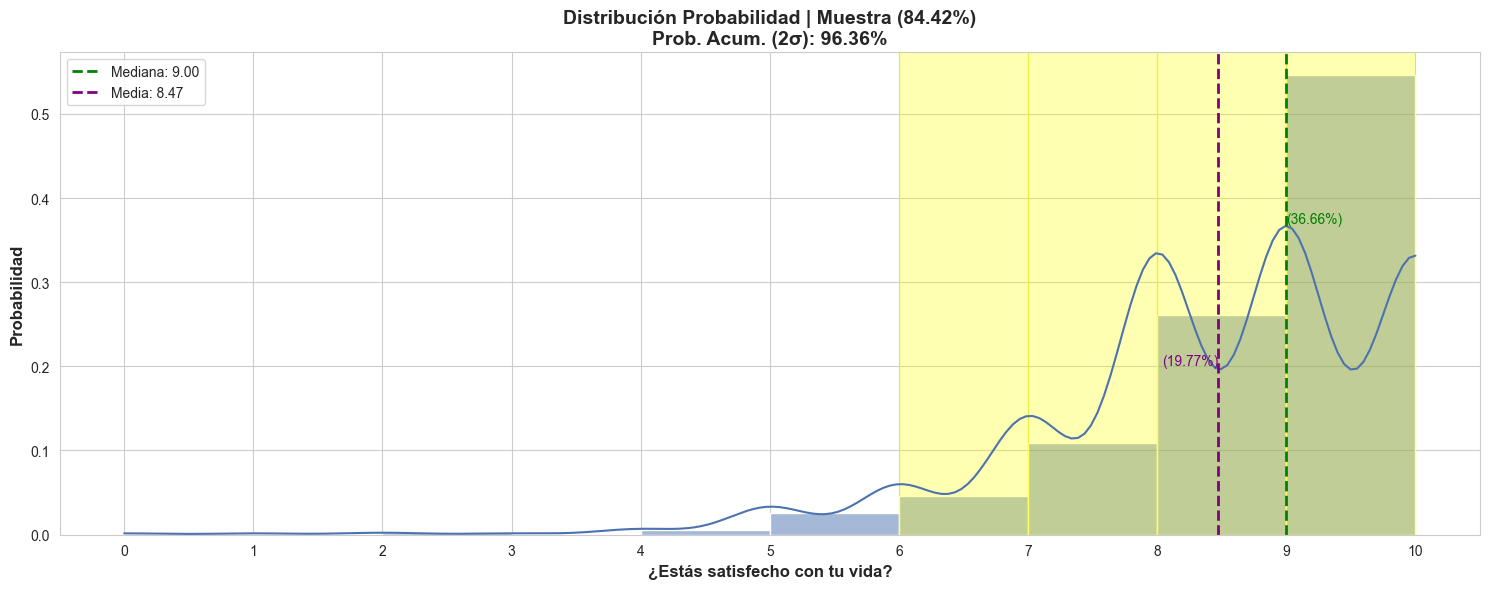

In [20]:
plot_hist('J','NPCJP9AA','¿Estás satisfecho con tu vida?')